# Jasmine's 2025 Boba Tracker

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import calplot

In [67]:
boba_raw = pd.read_csv('data/boba2025.csv')

In [68]:
boba_raw

,month,day,store,drink,toppings,drink name,friends,cost,size,rating
0,january,1,cafe bakery & restaurant,hong kong milk tea,NaN,NaN,"sophia, mom, dad, waipo",$4.75,16oz,8/10
1,january,2,1011 sip tea,lychee black milk tea,boba,NaN,"sophia, waipo",$5.50,16oz,7/10
2,january,3,mr sun tea,earl grey milk tea,"boba, pudding, grass jelly",three brothers milk tea,emily,$4.00,22oz,8.5/10
3,january,5,mandro teahouse,jasmine green milk tea,pudding,NaN,"emily, jas",$5.00,22oz,8.5/10
4,january,7,teaspoon,jasmine green milk tea,boba,creamy jasmine,jeff,$6.75,22oz,9/10
...,...,...,...,...,...,...,...,...,...,...
250,september,20,chicha san chen,milk tea,boba,bubble milk tea,lloyd,$9.25,16oz,8.5/10
251,september,20,chicha san chen,fruit tea,"passion fruit, orange slices, apple slices",classic fruit tea,lloyd,$9.75,16oz,8.5/10
252,september,21,heytea,mango coconut smoothie,"sago, coconut pudding, mango puree, grapefruit...",mango grapefruit boom,lloyd,$7.99,16oz,10/10
253,september,21,heytea,mango smoothie,cheese foam,cloud mango,lloyd,$7.49,16oz,10/10


In [69]:
boba = boba_raw.copy()

In [70]:
def get_toppings(toppings):
    if pd.isnull(toppings):
        return ['no topping']
    return toppings.split(', ')

def get_friends(friends):
    if pd.isnull(friends):
        return ['by myself']
    return friends.split(', ')

def get_category(drink):
    if 'milk tea' in drink:
        return 'milk tea'
    elif 'milk' in drink:
        return 'milk'
    elif 'tea' in drink:
        return 'tea'
    elif 'smoothie' in drink or 'slush' in drink:
        return 'blended'
    else:
        return 'other'

boba['toppings'] = boba['toppings'].apply(get_toppings)
boba['friends'] = boba['friends'].apply(get_friends)
boba['type'] = boba['drink'].apply(get_category)

In [71]:
month_map = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12
}

boba['month_num'] = boba['month'].map(month_map).astype(int)
boba['date'] = boba['day'].astype(int)
boba['date_obj'] = boba.apply(lambda row: datetime(year=2025, month=row['month_num'], day=row['date']), axis=1)
boba['weekday'] = boba['date_obj'].apply(lambda d: d.weekday() + 1)

In [72]:
weekday_map = {
    1: "monday",
    2: "tuesday",
    3: "wednesday",
    4: "thursday",
    5: "friday",
    6: "saturday",
    7: "sunday"
}

boba['day of week'] = boba['weekday'].map(weekday_map)

In [73]:
boba

,month,day,store,drink,toppings,drink name,friends,cost,size,rating,type,month_num,date,date_obj,weekday,day of week
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",$4.75,16oz,8/10,milk tea,1,1,2025-01-01,3,wednesday
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",$5.50,16oz,7/10,milk tea,1,2,2025-01-02,4,thursday
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],$4.00,22oz,8.5/10,milk tea,1,3,2025-01-03,5,friday
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",$5.00,22oz,8.5/10,milk tea,1,5,2025-01-05,7,sunday
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],$6.75,22oz,9/10,milk tea,1,7,2025-01-07,2,tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,september,20,chicha san chen,milk tea,[boba],bubble milk tea,[lloyd],$9.25,16oz,8.5/10,milk tea,9,20,2025-09-20,6,saturday
251,september,20,chicha san chen,fruit tea,"[passion fruit, orange slices, apple slices]",classic fruit tea,[lloyd],$9.75,16oz,8.5/10,tea,9,20,2025-09-20,6,saturday
252,september,21,heytea,mango coconut smoothie,"[sago, coconut pudding, mango puree, grapefrui...",mango grapefruit boom,[lloyd],$7.99,16oz,10/10,blended,9,21,2025-09-21,7,sunday
253,september,21,heytea,mango smoothie,[cheese foam],cloud mango,[lloyd],$7.49,16oz,10/10,blended,9,21,2025-09-21,7,sunday


In [74]:
boba_clean = boba.drop(columns=['month_num', 'date', 'weekday'])
boba_clean

,month,day,store,drink,toppings,drink name,friends,cost,size,rating,type,date_obj,day of week
0,january,1,cafe bakery & restaurant,hong kong milk tea,[no topping],NaN,"[sophia, mom, dad, waipo]",$4.75,16oz,8/10,milk tea,2025-01-01,wednesday
1,january,2,1011 sip tea,lychee black milk tea,[boba],NaN,"[sophia, waipo]",$5.50,16oz,7/10,milk tea,2025-01-02,thursday
2,january,3,mr sun tea,earl grey milk tea,"[boba, pudding, grass jelly]",three brothers milk tea,[emily],$4.00,22oz,8.5/10,milk tea,2025-01-03,friday
3,january,5,mandro teahouse,jasmine green milk tea,[pudding],NaN,"[emily, jas]",$5.00,22oz,8.5/10,milk tea,2025-01-05,sunday
4,january,7,teaspoon,jasmine green milk tea,[boba],creamy jasmine,[jeff],$6.75,22oz,9/10,milk tea,2025-01-07,tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,september,20,chicha san chen,milk tea,[boba],bubble milk tea,[lloyd],$9.25,16oz,8.5/10,milk tea,2025-09-20,saturday
251,september,20,chicha san chen,fruit tea,"[passion fruit, orange slices, apple slices]",classic fruit tea,[lloyd],$9.75,16oz,8.5/10,tea,2025-09-20,saturday
252,september,21,heytea,mango coconut smoothie,"[sago, coconut pudding, mango puree, grapefrui...",mango grapefruit boom,[lloyd],$7.99,16oz,10/10,blended,2025-09-21,sunday
253,september,21,heytea,mango smoothie,[cheese foam],cloud mango,[lloyd],$7.49,16oz,10/10,blended,2025-09-21,sunday


### stores

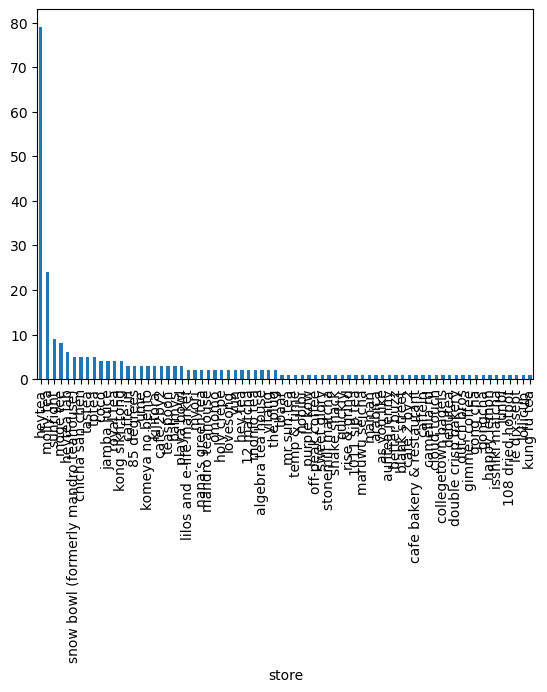

In [75]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False).plot.bar();

In [45]:
num_stores = boba_clean.groupby('store').count()['drink'].shape[0]
print(f'I have been to {num_stores} different stores in 2025 (not counting different locations of the same chain!)')

I have been to 74 different stores in 2025 (not counting different locations of the same chain!)


top 30 stores

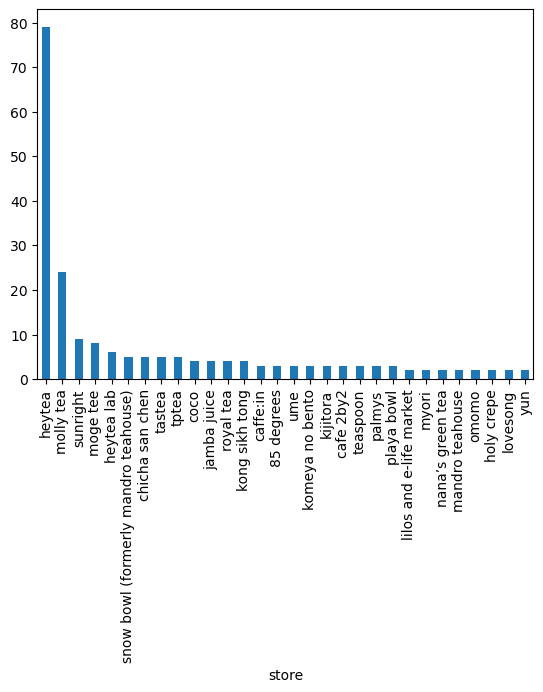

In [56]:
boba_clean.groupby('store').count()['drink'].sort_values(ascending=False)[:30].plot.bar();

### day of the week

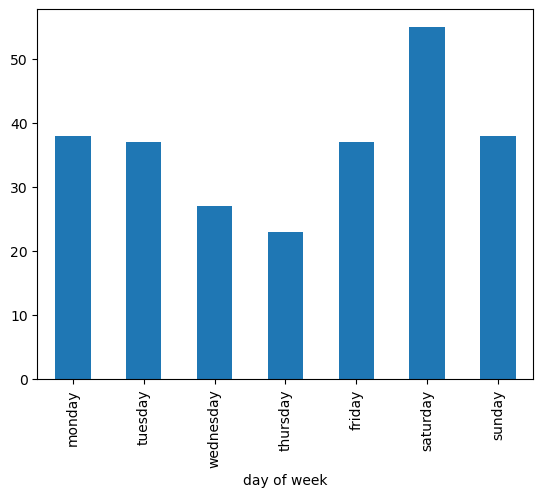

In [46]:
weekday_order = weekday_map.values()
boba_clean.groupby('day of week').count()['drink'].reindex(weekday_order).plot.bar();

In [54]:
week_frequencies = boba_clean.groupby('day of week').count().sort_values(
    by='drink', ascending=False)['drink']
popular_day = week_frequencies.index[0]
popular_day_count = week_frequencies[0]
print(f'I get boba most often on {popular_day}s, having gotten {popular_day_count} drinks on this day of the week in 2025.')

I get boba most often on saturdays, having gotten 55 drinks on this day of the week in 2025.


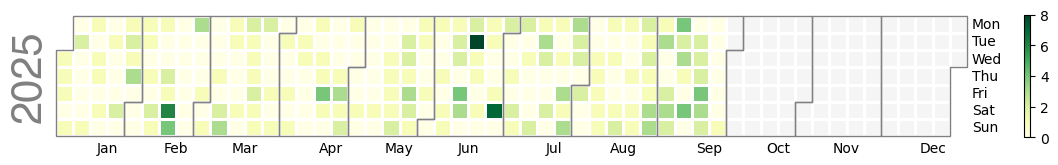

In [55]:
calplot.calplot(boba_clean.groupby('date_obj').count()['drink'], cmap='YlGn');

### unique drinks

In [57]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)

drink
mango coconut smoothie     34
jasmine milk tea           17
mango smoothie             17
matcha latte               11
milk tea                    9
                           ..
jasmine green tea latte     1
jasmine floral milk tea     1
iced peach oolong tea       1
honey lavender latte        1
yuzu black tea slushie      1
Name: day, Length: 100, dtype: int64

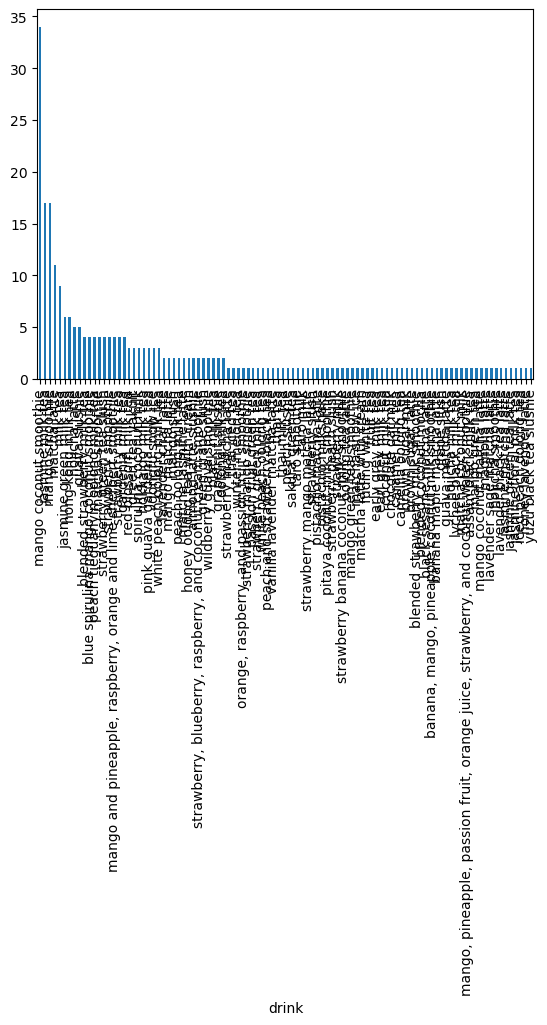

In [61]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False).plot.bar();

top 10 unique drinks

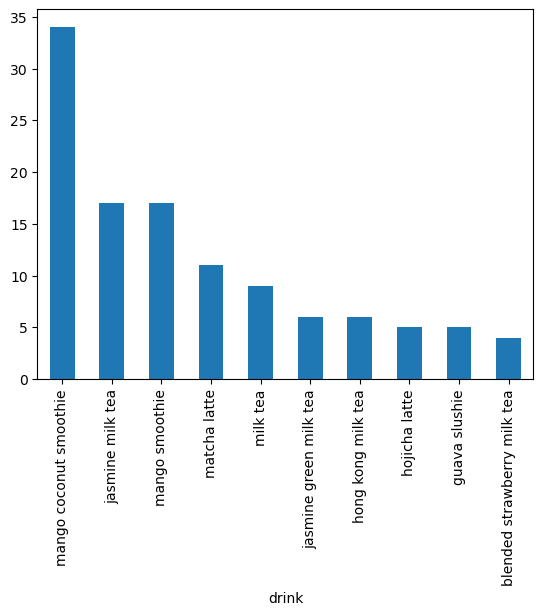

In [59]:
boba_clean.groupby('drink')['day'].count().sort_values(ascending=False)[:10].plot.bar();

### toppings

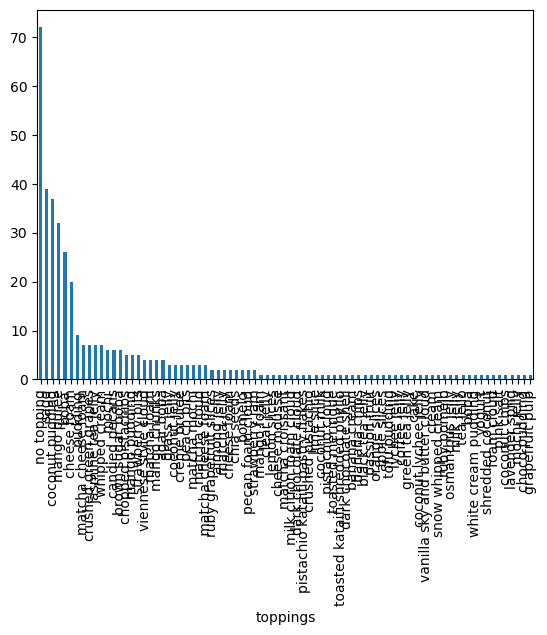

In [60]:
boba_clean['toppings'].dropna().explode().value_counts().plot.bar();

top 10 toppings

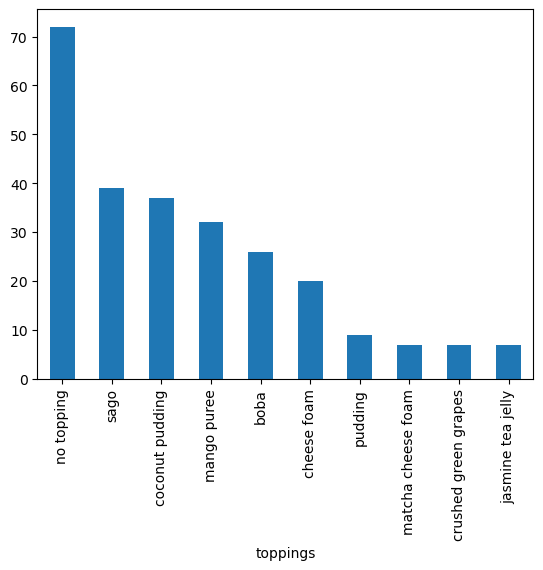

In [62]:
boba_clean['toppings'].dropna().explode().value_counts()[:10].plot.bar();

toppings by group (when i get them together in a drink)

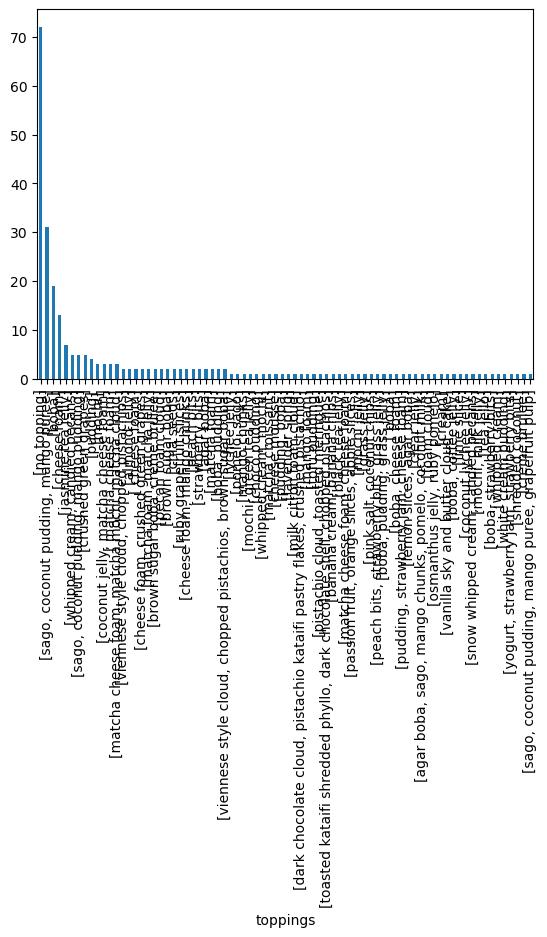

In [63]:
boba_clean['toppings'].dropna().value_counts().plot.bar();

top 10 toppings by group (when i get them together in a drink)

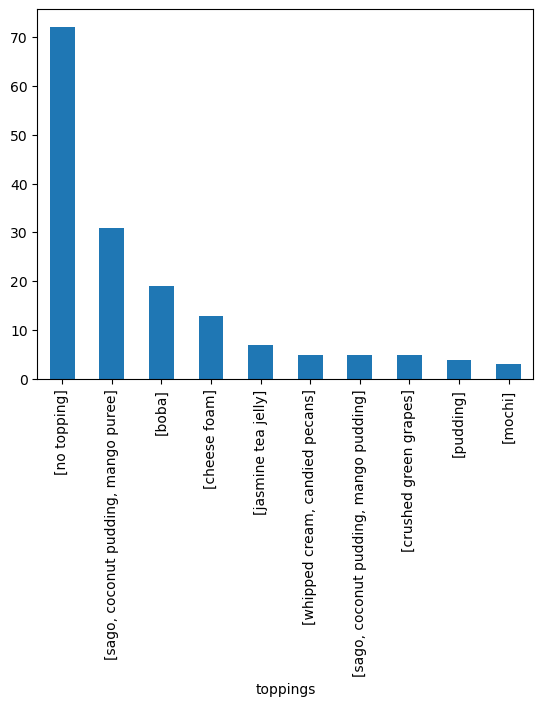

In [64]:
boba_clean['toppings'].dropna().value_counts()[:10].plot.bar();

### friends

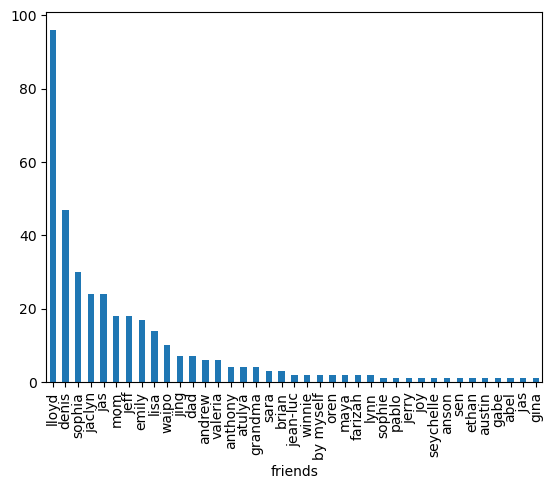

In [76]:
boba_clean['friends'].dropna().explode().value_counts().plot.bar();

friends that went to get boba together as a group

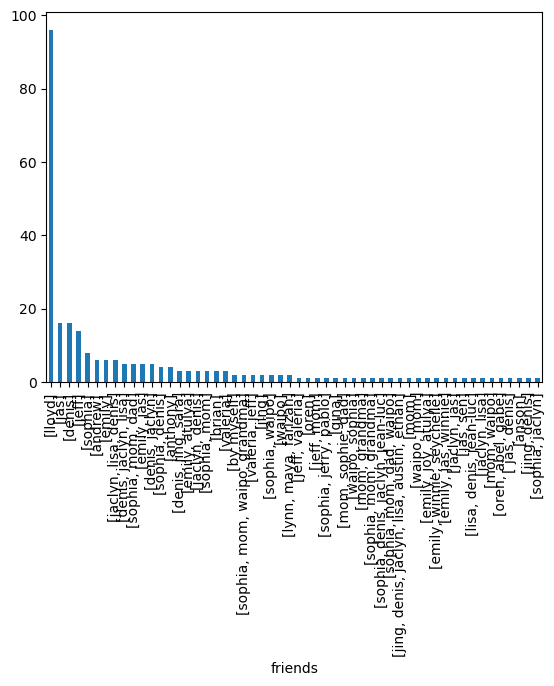

In [77]:
boba_clean['friends'].dropna().value_counts().plot.bar();